# Wine Quality Prediction using Decision Tree

## Importing Libraries

In [81]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from IPython.display import Image 
import pydotplus
import matplotlib.pyplot as plt

Wine certification includes physiochemical tests like determination of density, pH, alcohol quantity, fixed and volatile acidity etc. We have a large datasets having the physiochemical tests results and quality on the scale of 1 to 10 of wines of the Vinho Verde variety.Such a model can be used not only by the certification bodies but also by the wine producers to improve quality based on the physicochemical properties and by the consumers to predict the quality of wines.


## Reading Data

In [82]:
data = pd.read_csv('winequality_red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [83]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [84]:
# Missing Values
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [85]:
X = data.drop(columns='quality')
y = data['quality']

In [86]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [87]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

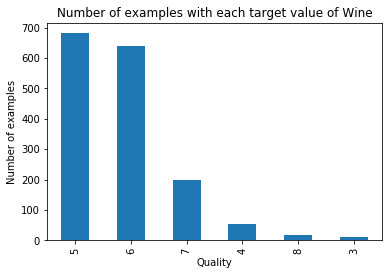

In [88]:
y.value_counts().plot.bar()
plt.xlabel("Quality")
plt.ylabel("Number of examples")
plt.title('Number of examples with each target value of Wine')
plt.show()

## Checking the tree performance on the data without doing any pre processing

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 355)

In [90]:
print('x_train: ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train: ',x_train.shape)
print('y_test : ',y_test.shape)

x_train:  (1279, 11)
x_test :  (320, 11)
y_train:  (1279, 11)
y_test :  (320,)


In [91]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
feature_name = list(X.columns)
class_name = list(y_train.unique())

In [93]:
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [94]:
class_name

[6, 5, 4, 7, 8, 3]

In [95]:
dot_data = export_graphviz(clf, feature_names= feature_name, rounded = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("mytree.png")
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [98]:
clf.score(x_train,y_train)

1.0

In [99]:
#py_pred = clf.predict(x_test)

In [100]:
clf.score(x_test,y_test)

0.634375

**Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings. Let's do all those and see how our score improves.**

## Standardizing Feature Variables

In [101]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

## Spliting data again after Standardization

In [102]:
x_train, x_test, y_train, y_test= train_test_split(x_transform,y,test_size = 0.25, random_state= 0)

In [103]:
print('x_train: ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train: ',x_train.shape)
print('y_test : ',y_test.shape)

x_train:  (1199, 11)
x_test :  (400, 11)
y_train:  (1199, 11)
y_test :  (400,)


## Hyper parameter Tuning

Let's now try to tune some hyperparameters using the GridSearchCV algorithm. We have studied about CrossValidation in upcoming lecture.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of different parameters passed. Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best.

In [104]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter': ['best','random']
}

In [105]:
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param, cv=5, n_jobs= 2)

In [106]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [107]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [108]:
grid_search.best_score_

0.6146792189679219

In [109]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')

clf= DecisionTreeClassifier(random_state=1)

In [110]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

## Model Evaluation

In [111]:
clf.score(x_test,y_test)

0.625

In [112]:
y_pred= clf.predict(x_test)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.07      0.08        14
           5       0.69      0.66      0.68       169
           6       0.65      0.68      0.66       170
           7       0.44      0.53      0.48        40
           8       0.50      0.20      0.29         5

    accuracy                           0.62       400
   macro avg       0.40      0.36      0.36       400
weighted avg       0.62      0.62      0.62       400



In [114]:
#conf_mat = confusion_matrix(y_test, y_pred)
#conf_mat

## Interpreting the ML Model

To get a better sense of what is going on inside the Decision Tree model, we can visualize how our model uses the different features and which features have greater effect.

Text(0.5, 0, 'Importance')

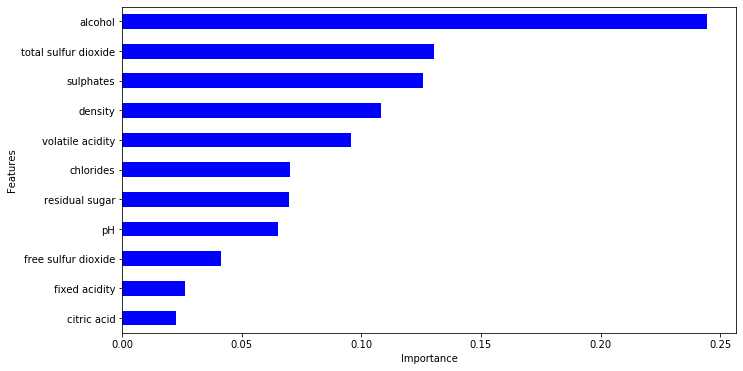

In [115]:
coeff = list(clf.feature_importances_)
labels = list(X.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Saving the Model

Now we will save our trained model for future use using **pickle**

In [116]:
import pickle

with open('modelForPrediction.sav','wb') as f:
    pickle.dump(clf,f)

with open('StandardScalar.sav','wb') as f:
    pickle.dump(scalar,f)